# AI Tool Utilization and Sentiment Analysis (CapEx 2026)

Over the last year, Paramount has invested heavily in an array of AI products. Employees and teams excitedly pitched their favorite products, and the company eagerly tested and tried products. A year later, Paramout's list of AI tools have ballooned along with its increased CapEX, while also creating a division of tool usage, satisfaction, and engagement. This is a data-driven framework to evalue AI software tool adoption across the creative and operation teams across Paramount to gain an understanding of value per expenditure by focusing on user satisfaction and daily usage. The project synthesizes sample survey data for BET Digital, CBS Marketing, Editorial Post Production Operations, Paramount Plus, The Multiplatform Group, and Nickelodeon Digital. The tools this project focuses on are AI tools whose primary focus is generative AI such as: Runway ML, Google Gemini, Adobe Firefly, ChatGPT, Microsoft Copilot, Claude AI, and Cursor. Tools that offer AI as a feature are not included in this study. 

## Key Business Questions Addressed
1. **Product Performance:** Which AI products deliver the highest perceived value based on usage and satisfaction?
2. **Strategic ROI** Which tools provide the highest efficiency per dollar spent based on cost and product performance? 

To determine the value, a baseline score is utilized. This baseline score is created with `value_index = user_satisfaction * weekly_usage`


### Exploration and Cleaning

Before creating reports, the data was merged together. It was checked for missing values, data duplication, and data integrity (data was assigned its correct data type). Names and spellings were standardized. Especially job titles, such as 'Video Editor' and 'Editor'. A new CSV was then created.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# DATA CLEANING

In [ ]:
#imported the survey data
bet = pd.read_csv('data/bet_digital.csv')
cbs = pd.read_csv('data/CBS_Marketing.csv')
eppo = pd.read_csv('data/Editorial_Post_Production_Operations.csv')
nick = pd.read_csv('data/Nickelodeon_Digital.csv')
pplus = pd.read_csv('data/Paramount_Plus_Brand_Creative.csv')
mpg = pd.read_csv('data/The_Multiplatform_Group.csv')

In [ ]:
# merge data into one dataframe
csvs = [bet, cbs, eppo, nick, pplus, mpg]
df= pd.concat(csvs, ignore_index=True) #concat takes a list of dictionaries

In [ ]:
# verify that it worked
df

,User Name,Role,Product,User Satisfaction (0-5),Weekly Usage (0-7),Team
0,Marley Davis,Social Media Manager,Runway ML,5,3,BET Digital
1,Marley Davis,Social Media Manager,Google Gemini,2,0,BET Digital
2,Marley Davis,Social Media Manager,Adobe Firefly,4,5,BET Digital
3,Marley Davis,Social Media Manager,ChatGPT,3,2,BET Digital
4,Marley Davis,Social Media Manager,Microsoft Copilot,3,1,BET Digital
...,...,...,...,...,...,...
2305,Marley Wright,Multi-platform Editor,Adobe Firefly,0,0,The Multiplatform Group
2306,Marley Wright,Multi-platform Editor,ChatGPT,3,3,The Multiplatform Group
2307,Marley Wright,Multi-platform Editor,Microsoft Copilot,2,1,The Multiplatform Group
2308,Marley Wright,Multi-platform Editor,Claude AI,2,2,The Multiplatform Group


In [ ]:
#check datatypes and values for outliers
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_name          2310 non-null   object
 1   role               2310 non-null   object
 2   product            2310 non-null   object
 3   user_satisfaction  2310 non-null   int64 
 4   weekly_usage       2310 non-null   int64 
 5   team               2310 non-null   object
 6   value_index        2310 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 126.5+ KB
None
       user_satisfaction  weekly_usage  value_index
count        2310.000000   2310.000000  2310.000000
mean            2.510390      1.164502     4.406494
std             1.409497      1.468522     6.337324
min             0.000000      0.000000     0.000000
25%             1.000000      0.000000     0.000000
50%             2.000000      0.000000     0.000000
75%             4.000000      2.000000     8.00000

In [26]:
#check for null values
print("Null Values:")
print(df.isnull().sum())
print("-----")
print("Duplicated:")
print(df.duplicated().sum())

Null Values:
user_name            0
role                 0
product              0
user_satisfaction    0
weekly_usage         0
team                 0
value_index          0
dtype: int64
-----
Duplicated:
0


In [7]:
# strip whitespace from row data
# for data in df.columns:
#    if df[data].dtype == 'object':
#      df[data] = df[data].str.strip()

# this is the same as the for loop
df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#strip whitespace from column names and lower the name
df.columns = df.columns.str.strip().str.lower()
df.columns = df.columns.str.replace(" ", "_")

df.head()

,user_name,role,product,user_satisfaction_(0-5),weekly_usage_(0-7),team
0,Marley Davis,Social Media Manager,Runway ML,5,3,BET Digital
1,Marley Davis,Social Media Manager,Google Gemini,2,0,BET Digital
2,Marley Davis,Social Media Manager,Adobe Firefly,4,5,BET Digital
3,Marley Davis,Social Media Manager,ChatGPT,3,2,BET Digital
4,Marley Davis,Social Media Manager,Microsoft Copilot,3,1,BET Digital


In [ ]:
# verfiy that the job titles are all similar
df['role'].unique()

array(['Social Media Manager', 'Video Editor', 'Content Creator',
       'Motion Designer', 'Producer', 'Digital Strategist', 'Copywriter',
       'Graphic Designer', 'Creative Director', 'Community Manager',
       'Brand Manager', 'Videographer', 'Promo Producer', 'Media Buyer',
       'Marketing Manager', 'Campaign Strategist', 'Editor',
       'Avid Editor', 'Content Producer', 'Marketing Coordinator',
       'Brand Specialist', 'Creative Services Manager',
       'Post Production Supervisor', 'Media Manager', 'Encoder',
       'Quality Control Specialist', 'Workflow Manager',
       'Post Coordinator', 'Archive Specialist', 'Assistant Editor',
       'Operations Manager', 'Creative Lead', 'Kids Content Creator',
       'Digital Producer', 'Animation Designer', 'Brand Designer',
       'Campaign Manager', 'Video Producer', 'Art Director', 'Animator',
       'Visual Designer', 'Motion Graphics Designer',
       'Creative Strategist', 'UX Designer', 'Marketing Designer',
       'Plat

In [27]:
# standardize the names and titles with .replace()
role_mapping = {
    'Creative Lead': 'Creative Director',
    'Social Media Specialist': 'Social Media Manager',
    'Campaign Manager': 'Campaign Manager',
    'Platform Manager': 'Community Manager',
    'Digital Strategist': 'Content Strategist', # <--- Added missing comma
    'Multi-platform Editor': 'Video Editor',
    'Editor': 'Staff Writer',
    'Avid Editor': 'Video Editor',
    'Motion Designer': 'Motions Graphics Designer',
    'Promo Producer' : 'Producer',
    'Campaign Strategist': 'Campaign Manager',
    'Encoder': 'Media Manager',
    'Workflow Manager': 'Operations Manager',
    'Animation Designer': 'Animator',
    'Brand Specialist': 'Brand Manager'
}
df['role'] = df['role'].replace(role_mapping)

In [28]:
#verify that it worked
df['role'].unique()

array(['Social Media Manager', 'Video Editor', 'Content Creator',
       'Motions Graphics Designer', 'Producer', 'Content Strategist',
       'Copywriter', 'Graphic Designer', 'Creative Director',
       'Community Manager', 'Brand Manager', 'Videographer',
       'Media Buyer', 'Marketing Manager', 'Campaign Manager',
       'Staff Writer', 'Content Producer', 'Marketing Coordinator',
       'Creative Services Manager', 'Post Production Supervisor',
       'Media Manager', 'Quality Control Specialist',
       'Operations Manager', 'Post Coordinator', 'Archive Specialist',
       'Assistant Editor', 'Kids Content Creator', 'Digital Producer',
       'Animator', 'Brand Designer', 'Video Producer', 'Art Director',
       'Visual Designer', 'Motion Graphics Designer',
       'Creative Strategist', 'UX Designer', 'Marketing Designer',
       'Content Coordinator', 'Audience Developer',
       'Distribution Manager'], dtype=object)

In [29]:
#simmplify the names
df = df.rename(columns={'user_satisfaction_(0-5)':'user_satisfaction', 'weekly_usage_(0-7)':'weekly_usage'})

In [30]:
#calculating a value index
df['value_index'] = df['user_satisfaction'] * df['weekly_usage']

In [31]:
#verify it worked
df.head()

,user_name,role,product,user_satisfaction,weekly_usage,team,value_index
0,Marley Davis,Social Media Manager,Runway ML,5,3,BET Digital,15
1,Marley Davis,Social Media Manager,Google Gemini,2,0,BET Digital,0
2,Marley Davis,Social Media Manager,Adobe Firefly,4,5,BET Digital,20
3,Marley Davis,Social Media Manager,ChatGPT,3,2,BET Digital,6
4,Marley Davis,Social Media Manager,Microsoft Copilot,3,1,BET Digital,3


In [15]:
df.to_csv('/Users/lawhea1214/Documents/portfolio/data_analysis/utilization/data/total_department_surveys.csv', index=False)

In [16]:
ts = pd.read_csv('/Users/lawhea1214/Documents/portfolio/data_analysis/utilization/data/total_department_surveys.csv')

In [17]:
ts

,user_name,role,product,user_satisfaction,weekly_usage,team,value_index
0,Marley Davis,Social Media Manager,Runway ML,5,3,BET Digital,15
1,Marley Davis,Social Media Manager,Google Gemini,2,0,BET Digital,0
2,Marley Davis,Social Media Manager,Adobe Firefly,4,5,BET Digital,20
3,Marley Davis,Social Media Manager,ChatGPT,3,2,BET Digital,6
4,Marley Davis,Social Media Manager,Microsoft Copilot,3,1,BET Digital,3
...,...,...,...,...,...,...,...
2305,Marley Wright,Video Editor,Adobe Firefly,0,0,The Multiplatform Group,0
2306,Marley Wright,Video Editor,ChatGPT,3,3,The Multiplatform Group,9
2307,Marley Wright,Video Editor,Microsoft Copilot,2,1,The Multiplatform Group,2
2308,Marley Wright,Video Editor,Claude AI,2,2,The Multiplatform Group,4


Text(1, 1, 'Correlation (r)= 0.72')

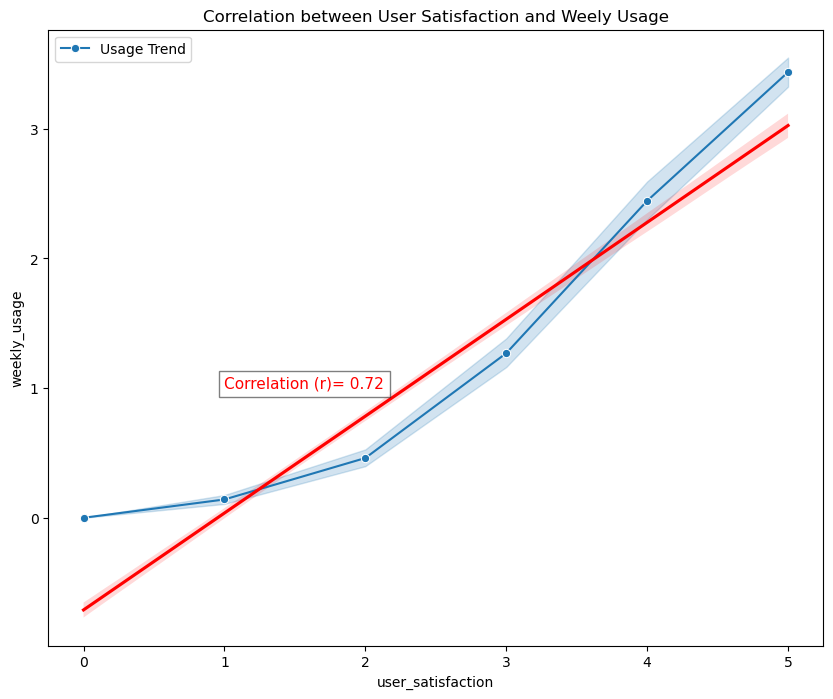

In [45]:
# Calcualte the correlation coefficient
pearson_correlation = ts['user_satisfaction'].corr(ts['weekly_usage'])

#Create the plot
plt.figure(figsize=(10,8))
sns.lineplot(data=ts, x='user_satisfaction', y='weekly_usage', label = 'Usage Trend', marker='o')


plt.title("Correlation between User Satisfaction and Weely Usage")
plt.xlabel("User Satisfaction")
plt.ylabel("Weekly Usage")

#Overlap the pearson correlation
sns.regplot(data=ts, x='user_satisfaction', y='weekly_usage', scatter=False, color='red', label='Regression Line')
plt.text(1, 1, f"Correlation (r)={pearson_correlation: .2f}", fontsize=11, color='red', bbox=dict(facecolor='white', alpha=0.5))


/var/folders/6y/v47t4ktd7lvfxclxcyds8jhhvvchz8/T/ipykernel_12574/2334338725.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average, y='user_satisfaction', x='product', palette=colors)


Text(0, 0.5, 'User Satisfaction')

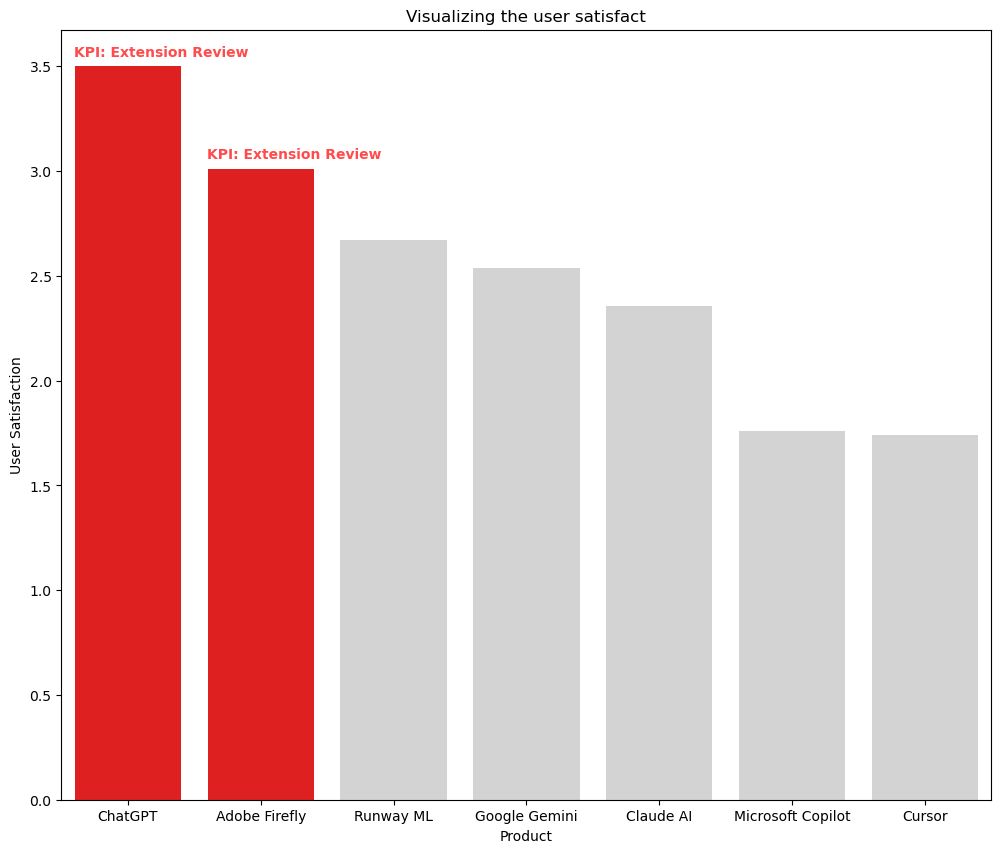

In [69]:
#obtain the overall averages for each product
average = ts.groupby('product')[['user_satisfaction']].agg('mean').sort_values(by='user_satisfaction', ascending=False).reset_index()

#Create a KPI by defining a threshold and creating string literal
threshold = 3.0
colors = ['red' if x > threshold else 'lightgrey' for x in average['user_satisfaction']]

#Making the Plot

plt.figure(figsize=(12,10))
sns.barplot(data=average, y='user_satisfaction', x='product', palette=colors)

#add the kpi label
for index, row in average.iterrows():
    if row['user_satisfaction']> threshold:
        plt.text(index + .25, row['user_satisfaction'] + 0.05, "KPI: Extension Review", ha='center', fontsize=10, fontweight='bold', color='#FF4B4B' )
#labels

plt.title("Visualizing the user satisfact")
plt.xlabel("Product")
plt.ylabel("User Satisfaction")


In [ ]:
#View User satisfaction and weekly usage for products by teams
ts.groupby(['team', 'product'])[['user_satisfaction', 'weekly_usage']].mean().sort_values(by="product")

,,user_satisfaction,weekly_usage
team,product,,
BET Digital,Adobe Firefly,3.984615,3.323077
Paramount Plus Brand Creative,Adobe Firefly,3.750000,2.975000
Nickelodeon Digital,Adobe Firefly,3.733333,2.933333
Editorial Post Production Operations,Adobe Firefly,2.400000,0.742857
CBS Marketing,Adobe Firefly,1.812500,0.000000
The Multiplatform Group,Adobe Firefly,2.620000,0.960000
Editorial Post Production Operations,ChatGPT,3.400000,2.657143
Nickelodeon Digital,ChatGPT,3.566667,2.766667
CBS Marketing,ChatGPT,3.487500,2.412500


In [23]:
report = ts.pivot_table(index="team", columns="product", values="user_satisfaction")
report.to_csv("data/final_pivot_report.csv")

In [24]:
report

product,Adobe Firefly,ChatGPT,Claude AI,Cursor,Google Gemini,Microsoft Copilot,Runway ML
team,,,,,,,
BET Digital,3.984615,3.323077,2.630769,1.830769,2.630769,2.030769,3.446154
CBS Marketing,1.812500,3.487500,1.825000,1.287500,1.887500,1.225000,1.262500
Editorial Post Production Operations,2.400000,3.400000,2.428571,1.771429,2.514286,2.000000,3.457143
Nickelodeon Digital,3.733333,3.566667,2.550000,2.016667,2.650000,1.850000,3.316667
Paramount Plus Brand Creative,3.750000,3.475000,2.350000,1.675000,3.350000,1.950000,3.500000
The Multiplatform Group,2.620000,3.760000,2.560000,2.060000,2.680000,1.840000,1.920000


# Finacial Framework for ROI

To understand whether a tool is worth it, I need to know the price of product. 

* Fixed Costs: Most AI tools have a flat monthly fee
* Variable Costs: Some tools use credit-based pricing and charge extra fees based on the pricing. 
* In order to calculate the "Value-per-Dollar", I divide my weighted value perofrmance by the cost

I will use synthetic data to determine the cost vs. performance in order to explore the viability of this survey. I will store the cost in a dictionary. Then I will calculate the efficiency per dollar with the formula: `efficiency_per_dollar = expected_value_satisfaction / cost_structure['ai_tool_name']`

## Defining the sample space / outcomes

Probability theory relies on a defined environment of either historical data collected from surveys or theoretical data obtained from calculating the sample space. Calculating the expected value requires a sample space and the relative frequencies (probabilities). 

* My **Sample Space(_S_)** is my total pool of potential ratings. 
    * Satisfaction: _S_ = {0,1,2,3,4,5}
    * Utilization: _S_ = {0,1,2,3,4,5,6,7}

* The **True Outcomes (_x_)** are the actual values in my survey data. I calculated a composite outcome to obtain a value index, which was `satisfaction x usage`. This composite outcome is a calculated measurement I can use as a baseline to compare the products against each other and calculate value. 
* The **Probability(_P_(_x_))** is my relative frequency, which tells me how likely it is that random person on a team or across the company as a whole will obtain a specific value. 

### Expected Value as an ROI anchor

Once I have the expected value of the value index, I can obtain an average realized value the company obtains for each license that it purchases. 

* High _E[X]_ and High Cost: Tool is a premium.
* Low _E[X]_ and Low Cost: Tool is a low-risk purchase.
* Low _E[X]_ and High Cost: This is a red flag. 


In [ ]:
# Calculate the sample space and probabilities for Value Index
ts['value_index'] = ts